<a href="https://colab.research.google.com/github/nhanguyene/HOMEWORK_ARTIFICIAL_INTELLIGIENT/blob/main/Homework_Arm_2dofs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data from PC
from google.colab import files 
uploaded=files.upload()

Saving Data_Arm_2_dofs.csv to Data_Arm_2_dofs.csv


In [2]:
import keras
from keras.datasets import boston_housing
from tensorflow.keras.optimizers import RMSprop  # tính sai số.
from keras.callbacks import EarlyStopping  # Dừng nhanh, khi đạt 1 giá trị nào đó thì dừng xử lý.
from sklearn import preprocessing
from sklearn.preprocessing import scale, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [14]:
#Get data from colab
url ='Data_Arm_2_dofs.csv'
dataframe=pd.read_csv(url)

In [18]:
#Separate data into different column
theta=dataframe.drop(['px','py'], axis=1)
position=dataframe.drop(['theta1','theta2'], axis=1)
theta_train,theta_test,position_train,position_test=train_test_split(theta,position,test_size=0.2)
theta=theta.astype('float32')

In [19]:
model = Sequential()
model.add(Dense(64, kernel_initializer='normal', activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu')) 
model.add(Dense(2)) 
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,482
Trainable params: 4,482
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
9/9 [==============================] - 1s 22ms/step - loss: 35.3412 - accuracy: 0.5589 - val_loss: 44.4167 - val_accuracy: 0.6350
Epoch 2/1000
9/9 [==============================] - 0s 7ms/step - loss: 31.5366 - accuracy: 0.6457 - val_loss: 49.6636 - val_accuracy: 0.6350
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 30.3546 - accuracy: 0.6877 - val_loss: 55.9935 - val_accuracy: 0.5182
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 29.6634 - accuracy: 0.6977 - val_loss: 52.5748 - val_accuracy: 0.6606
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 28.9891 - accuracy: 0.7187 - val_loss: 57.4441 - val_accuracy: 0.5657
Epoch 6/1000
9/9 [==============================] - 0s 6ms/step - loss: 28.6914 - accuracy: 0.7288 - val_loss: 61.2822 - val_accuracy: 0.5255
Epoch 7/1000
9/9 [==============================] - 0s 8ms/step - loss: 28.2699 - accuracy: 0.7242 - val_loss: 57.0315 - val_accuracy: 0.6277
Epoch

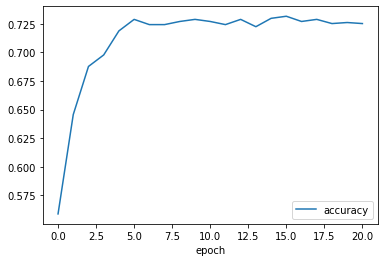

In [20]:
#Compile, Training and Checking
model.compile(loss='mae', optimizer=RMSprop(), metrics=['accuracy'])
history=model.fit(theta,position,batch_size=128, epochs=1000, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])
score = model.evaluate(theta,position, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

ylim=(0,1)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')

plt.legend(['accuracy'])
plt.show()


In [29]:
#Prediction and Result
theta_test=np.array(theta_test)
print(theta_test[250])
pos_predict = model.predict(theta_test[250].reshape(1,2))
print("Position Predicted: ",pos_predict)
position_test=np.array(position_test)
print("Real Position: ",position_test[250].reshape(1,2))


[ 30 350]
Position Predicted:  [[74.88838  10.064787]]
Real Position:  [[80.88897502 38.68080573]]
